In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import filterbyip as fbi
import Cdf
import Pmf

In [268]:
%autosave 0

Autosave disabled


In [269]:
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [270]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [271]:
#change 
tcp_tls_data = "./data2020/output_curl_gdrive100.csv"
quic_data = "./data2020/output_quic_gdrive100.csv"
gdrive = "./data2020/gdrive_id.csv"

In [272]:
scol_names = ['TimeOfMeasurement', 'Url', 'Ip', 'Port', 'DnsLookupTime', 'TCPHandshakeTime', 'ConnectionEstablishmentTime', 'TTFB', 'TotalDownloadTime', 'HttpResponse', 'HTTPVersion', 'Protocol']
tcol_names = ['TimeOfMeasurement', 'Url', 'Path', 'Ip', 'Port', 'DNSTime', 'ConnectionEstablishmentTime', 'TTFB', 'TotalDownloadTime', 'HttpResponse', 'Protocol']
g_names = ['size', 'id']

In [273]:
t = pd.read_csv(quic_data, ';', names=tcol_names, header=None)
s = pd.read_csv(tcp_tls_data, ';', names=scol_names, header=None)
gd = pd.read_csv(gdrive, ',', names=g_names, header=None)

In [274]:
t = t.dropna()
s=s.dropna()
s['TTFB']=s['TTFB']-s['DnsLookupTime']
s['TotalDownloadTime']=s['TotalDownloadTime']-s['DnsLookupTime']

In [275]:
import re
def extract_id(path):
    id = re.search('\*\/(.*)\?', path)
    return id.group(1)

In [276]:
t['id'] = t['Path'].apply(extract_id)

In [277]:
import re
def substitute(string):
    replaced = string
    if re.search('K', string):
        replaced = re.sub('K','', string)
    if re.search('M', string):
        replaced = re.sub('M','000', string)
    if re.search('G', string):
        replaced = re.sub('G','000000', string)
    return replaced

In [278]:
gd['size'] = gd['size'].apply(substitute)

In [279]:
s['id'] = s['Url'].apply(extract_id)

In [280]:
t['Url'] = t['Url'] + t['Path']

In [281]:
t = t.join(gd.set_index('id'), on='id', rsuffix='_right')

In [282]:
s = s.join(gd.set_index('id'), on='id', rsuffix='_right')

In [283]:
t['size'] = t['size'].astype(int)
s['size'] = s['size'].astype(int)
t['TotalDownloadTime'] = t['TotalDownloadTime'].astype(float)
s['TotalDownloadTime'] = s['TotalDownloadTime'].astype(float)

In [284]:
t['Throughput'] = (t['size']/t['TotalDownloadTime'])

In [285]:
s['Throughput'] = (s['size']/s['TotalDownloadTime'])

In [286]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,id,size,Throughput
0,1588813201,doc-04-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.23.97,443,18.923,42.528,169.506,169.633,403.0,Q043,1lsRzxeAEzsM1KVu6oQ88LgUYuDSKjhmw,200000,1179.015875
1,1588813201,doc-04-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.23.97,443,0.565,33.291,159.041,159.142,403.0,Q046,1lsRzxeAEzsM1KVu6oQ88LgUYuDSKjhmw,200000,1256.739264
2,1588813201,doc-04-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.23.97,443,0.762,33.272,157.041,157.111,403.0,Q050,1lsRzxeAEzsM1KVu6oQ88LgUYuDSKjhmw,200000,1272.985342
4,1588813202,doc-04-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,2a00:1450:4001:800::2001,443,0.639,31.969,175.348,175.469,403.0,Q043,1lsRzxeAEzsM1KVu6oQ88LgUYuDSKjhmw,200000,1139.802472
5,1588813202,doc-04-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,2a00:1450:4001:800::2001,443,0.557,32.162,156.289,156.404,403.0,Q046,1lsRzxeAEzsM1KVu6oQ88LgUYuDSKjhmw,200000,1278.739674


In [287]:
t.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,id,size,Throughput
17593,1589690391,doc-0g-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.207.33,443,0.754,33.040,375.875,375.980,403.0,Q046,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,5319.431885
17594,1589690400,doc-0g-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,216.58.207.33,443,0.784,33.350,633.928,634.014,403.0,Q050,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,3154.504475
17596,1589690408,doc-0g-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,2a00:1450:4001:824::2001,443,0.572,31.778,278.612,278.708,403.0,Q043,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,7175.969115
17597,1589690416,doc-0g-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,2a00:1450:4001:801::2001,443,28.718,32.187,648.949,649.044,403.0,Q046,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,3081.455186
17598,1589690424,doc-0g-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,2a00:1450:4001:801::2001,443,0.545,31.751,990.565,990.665,403.0,Q050,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,2018.845927


In [288]:
s.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol,id,size,Throughput
0,1588813202,doc-04-4c-docs.googleusercontent.com/docs/secu...,172.217.23.97,443,4.197,9.043,95.355,219.850,219.886,403,HTTP/1.1,TCP/TLS1.2,1lsRzxeAEzsM1KVu6oQ88LgUYuDSKjhmw,200000,909.562228
1,1588813203,doc-04-4c-docs.googleusercontent.com/docs/secu...,172.217.23.97,443,4.152,8.894,69.325,194.697,194.765,403,HTTP2,TCP/TLS1.2,1lsRzxeAEzsM1KVu6oQ88LgUYuDSKjhmw,200000,1026.878546
2,1588813203,doc-04-4c-docs.googleusercontent.com/docs/secu...,2a00:1450:4001:800::2001,443,4.163,8.539,78.461,200.651,200.674,403,HTTP/1.1,TCP/TLS1.2,1lsRzxeAEzsM1KVu6oQ88LgUYuDSKjhmw,200000,996.641319
3,1588813203,doc-04-4c-docs.googleusercontent.com/docs/secu...,2a00:1450:4001:800::2001,443,4.186,8.507,77.363,204.535,204.569,403,HTTP2,TCP/TLS1.2,1lsRzxeAEzsM1KVu6oQ88LgUYuDSKjhmw,200000,977.665238
4,1588813204,doc-0o-4c-docs.googleusercontent.com/docs/secu...,172.217.23.97,443,4.157,8.858,68.328,191.037,191.060,403,HTTP/1.1,TCP/TLS1.2,1XSSiVM3jWJC09nZxWAYkYMgtGUwCfuEI,500000,2616.978959


In [289]:
s.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol,id,size,Throughput
8795,1589690382,doc-14-4c-docs.googleusercontent.com/docs/secu...,2a00:1450:4001:824::2001,443,4.145,8.529,66.627,8349.894,8349.969,403,HTTP2,TCP/TLS1.2,1eIPPQQ3b2GY1jx79eHJn5XF1eSng3my0,1000000,119.760924
8796,1589690442,doc-0g-4c-docs.googleusercontent.com/docs/secu...,216.58.207.33,443,4.164,8.966,69.037,7888.164,7888.201,403,HTTP/1.1,TCP/TLS1.2,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,253.543235
8797,1589690451,doc-0g-4c-docs.googleusercontent.com/docs/secu...,216.58.207.33,443,4.189,8.832,68.990,9735.404,9735.478,403,HTTP2,TCP/TLS1.2,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,205.434186
8798,1589690461,doc-0g-4c-docs.googleusercontent.com/docs/secu...,2a00:1450:4001:801::2001,443,4.148,8.500,66.928,9320.789,9320.839,403,HTTP/1.1,TCP/TLS1.2,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,214.572959
8799,1589690467,doc-0g-4c-docs.googleusercontent.com/docs/secu...,2a00:1450:4001:801::2001,443,4.183,8.540,68.127,6379.202,6379.277,403,HTTP2,TCP/TLS1.2,1qOoLPlJS5mqHmQfwrAoKwXB5kDyiclPw,2000000,313.515152


In [290]:
gd.head()

,size,id
0,1,1C45gZCBtJHnjNACQIagfJ2fTRKQaZ9k6
1,2,1yv4XxH7R74il-bxBS5Mz8Oiw6W7vwUFM
2,5,1sGGy4K1J3p0OQlLxUgbgsErokyBADg6g
3,10,1k7mg8XpQmW-jpO85yq3giwVUeL82NJhx
4,20,1Zr-g4qROFzaq_vZ4JnHneEb9JyRSUBXb


In [291]:
t = t.dropna()
s = s.dropna()

In [292]:
def filter_by_ip(df, column):
  """reads a DataFrame, calls fbi.filter_v{4,6} to get DataFrames with rows
     containing only v4, v6 endpoints. Returns the two DataFrame as a tuple"""

  dfv6 = fbi.filter_v6(df, column)
  dfv4 = fbi.filter_v4(df, column)
  return dfv4, dfv6

In [293]:
quic4, quic6 = filter_by_ip(t, column = 'Ip')

In [294]:
tcp4, tcp6 = filter_by_ip(s, column = 'Ip')

In [295]:
#quic4 = quic4.loc[quic4['size'] < 200000]
#tcp4 = tcp4.loc[tcp4['size'] < 200000]

In [296]:
quic43 = quic4.loc[t['Protocol'] == 'Q043']
quic46 = quic4.loc[t['Protocol'] == 'Q046']
quic50 = quic4.loc[t['Protocol'] == 'Q050']
quicietf = quic4.loc[t['Protocol'] == 'FF000018']

In [297]:
quic43_6 = quic6.loc[t['Protocol'] == 'Q043']
quic46_6 = quic6.loc[t['Protocol'] == 'Q046']
quic50_6 = quic6.loc[t['Protocol'] == 'Q050']
quicietf_6 = quic6.loc[t['Protocol'] == 'FF000018']

In [298]:
tcp12 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.2']
tcp13 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.3']

In [299]:
tcp12_6 = tcp6.loc[s['Protocol'] == 'TCP/TLS1.2']
tcp13_6 = tcp6.loc[s['Protocol'] == 'TCP/TLS1.3']

In [300]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 = Cdf.MakeCdfFromList(quic46['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quicietf['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['ConnectionEstablishmentTime'].values)
x2 = Cdf.MakeCdfFromList(tcp12['ConnectionEstablishmentTime'].values)

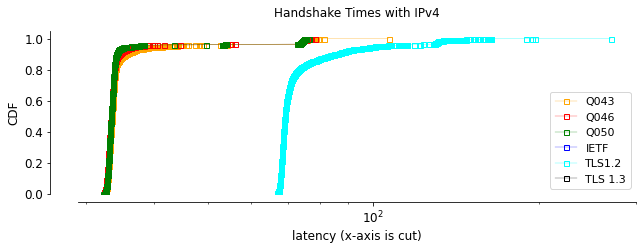

In [301]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q0ietf
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20, 100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF', 'TLS1.2', 'TLS 1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots2020/gdriveMunich100/handshake_times_ipv4_otherthan200.png', format='png', bbox_inches='tight')


In [302]:
x = Cdf.MakeCdfFromList(quic43_6['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic46_6['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic50_6['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quicietf_6['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13_6['ConnectionEstablishmentTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12_6['ConnectionEstablishmentTime'].values)

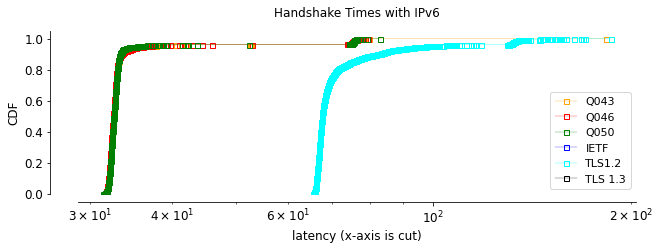

In [303]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#ietf
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20,100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF', 'TLS1.2', 'TLS 1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv6', fontsize=12, y=1.05)
plt.savefig('./plots2020/gdriveMunich100/handshake_times_ipv6.png', format='png', bbox_inches='tight')

In [304]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic46['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic50['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quicietf['TTFB'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TTFB'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TTFB'].values)

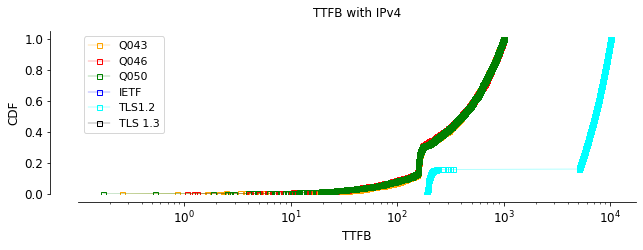

In [305]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#IETF
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([100, 600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF', 'TLS1.2', 'TLS 1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots2020/gdriveMunich100/TTFB_ipv4.png', format='png', bbox_inches='tight')

In [306]:
x = Cdf.MakeCdfFromList(quic43_6['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic46_6['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic50_6['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quicietf_6['TTFB'].values)
x4 = Cdf.MakeCdfFromList(tcp13_6['TTFB'].values)
x2 =Cdf.MakeCdfFromList(tcp12_6['TTFB'].values)

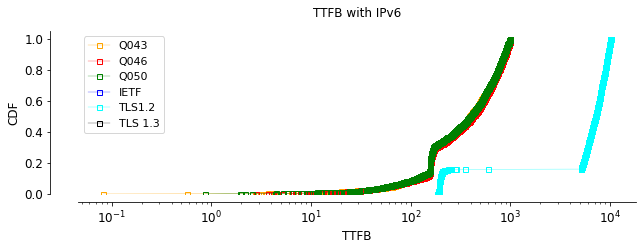

In [307]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#IETF
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([100,400])
#ax.set_xlim([0,10])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF', 'TLS1.2', 'TLS 1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv6', fontsize=12, y=1.05)
plt.savefig('./plots2020/gdriveMunich100/TTFB_ipv6.png', format='png', bbox_inches='tight')

In [308]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quicietf['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TotalDownloadTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TotalDownloadTime'].values)

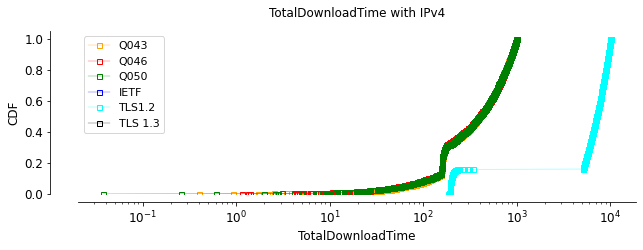

In [309]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#IETF
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([100,800])
#ax.set_xlim([0,10])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF', 'TLS1.2', 'TLS 1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots2020/gdriveMunich100/TotalDownloadTime_ipv4.png', format='png', bbox_inches='tight')

In [310]:
x = Cdf.MakeCdfFromList(quic43_6['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic46_6['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic50_6['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quicietf_6['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13_6['TotalDownloadTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12_6['TotalDownloadTime'].values)

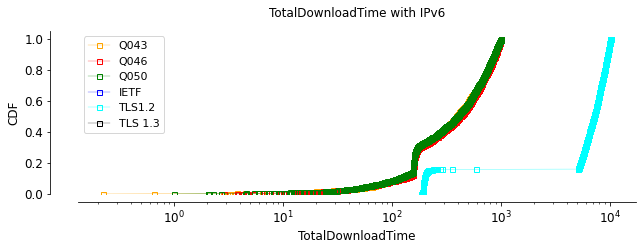

In [311]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#IETF
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([100,800])
#ax.set_xlim([0,10])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF', 'TLS1.2', 'TLS 1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv6', fontsize=12, y=1.05)
plt.savefig('./plots2020/gdriveMunich100/TotalDownloadTime_ipv6.png', format='png', bbox_inches='tight')

In [312]:
x = Cdf.MakeCdfFromList(quic43['Throughput'].values)
x1 =Cdf.MakeCdfFromList(quic46['Throughput'].values)
x3 = Cdf.MakeCdfFromList(quic50['Throughput'].values)
x5 = Cdf.MakeCdfFromList(quicietf['Throughput'].values)
x4 = Cdf.MakeCdfFromList(tcp13['Throughput'].values)
x2 =Cdf.MakeCdfFromList(tcp12['Throughput'].values)

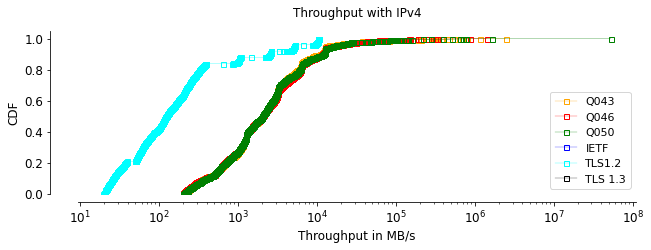

In [313]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#IETF
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([0,700])
#ax.set_xlim([0,10])
ax.set_xscale('log')
ax.set_xlabel('Throughput in MB/s', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF', 'TLS1.2', 'TLS 1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Throughput with IPv4', fontsize=12, y=1.05)
plt.savefig('./plots2020/gdriveMunich100/Throughput_ipv4.png', format='png', bbox_inches='tight')

In [314]:
x = Cdf.MakeCdfFromList(quic43_6['Throughput'].values)
x1 =Cdf.MakeCdfFromList(quic46_6['Throughput'].values)
x3 = Cdf.MakeCdfFromList(quic50_6['Throughput'].values)
x5 = Cdf.MakeCdfFromList(quicietf_6['Throughput'].values)
x4 = Cdf.MakeCdfFromList(tcp13_6['Throughput'].values)
x2 =Cdf.MakeCdfFromList(tcp12_6['Throughput'].values)

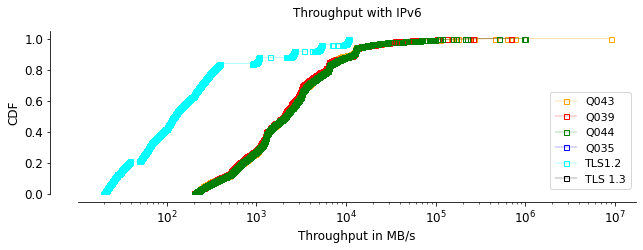

In [315]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#IETF
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([0,700])
#ax.set_xlim([0,10])
ax.set_xscale('log')
ax.set_xlabel('Throughput in MB/s', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q039', 'Q044', 'Q035', 'TLS1.2', 'TLS 1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Throughput with IPv6', fontsize=12, y=1.05)
plt.savefig('./plots2020/gdriveMunich100/Throughput_ipv6.png', format='png', bbox_inches='tight')


In [316]:
quic_mean= quic4.groupby('size', as_index=False).mean()
tcp_mean= tcp4.groupby('size', as_index=False).mean()

quic_mean.head()

quic_mean.tail()

,size,TimeOfMeasurement,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Throughput
0,200000,1.589251e+09,443.0,1.186187,35.110994,441.364265,441.452496,403.0,1682.137659
1,500000,1.589251e+09,443.0,0.979025,35.061344,439.259839,439.346267,403.0,3599.355834
2,1000000,1.589251e+09,443.0,1.547473,35.069248,451.679679,451.768605,403.0,9543.289191
3,2000000,1.589251e+09,443.0,0.999655,35.117078,442.987556,442.469748,403.0,46888.688849


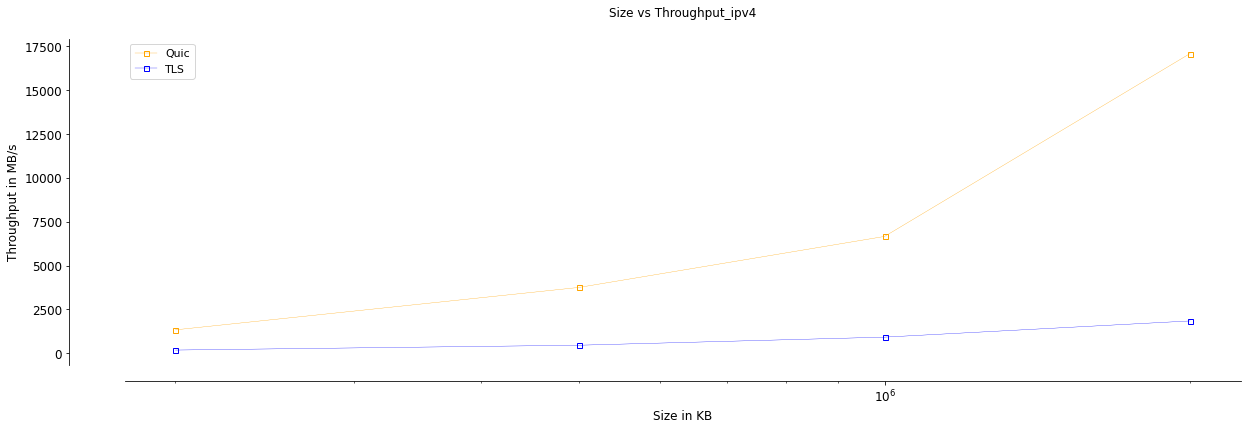

In [320]:
fig = plt.figure(figsize = (20,6))
plt.rcParams['font.size'] = 12
ax = plt.gca()
#yticks = np.arange(1000,100000000,10000)

#Quic
#plt.plot(quic4['size'], quic4['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

#plt.plot(tcp4['size'], tcp4['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
plt.plot(quic_mean['size'], quic_mean['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(tcp_mean['size'], tcp_mean['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')

ax = fig.axes[0]
ax.grid(False)
#ax.set_yticks(yticks)
#ax.set_ylim([0,1.05])
#ax.set_xlim([0,700])
#ax.set_xlim([0,10])
ax.set_xscale('liner')
ax.set_xlabel('Size in KB', fontsize=12)
ax.set_ylabel('Throughput in MB/s', fontsize=12)

plt.legend(['Quic', 'TLS'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Size vs Throughput_ipv4', fontsize=12, y=1.05)
plt.savefig('./plots2020/gdriveMunich100/sizevsThroughput_ipv4.png', format='png', bbox_inches='tight')



In [318]:
quic_mean= quic6.groupby('size', as_index=False).mean()
tcp_mean= tcp6.groupby('size', as_index=False).mean()

quic_mean.head()

quic_mean.tail()

,size,TimeOfMeasurement,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Throughput
0,200000,1.589251e+09,443.0,1.316055,34.264532,437.072384,437.168500,403.0,1338.816970
1,500000,1.589251e+09,443.0,0.965713,34.275385,450.344054,450.441104,403.0,3755.138105
2,1000000,1.589251e+09,443.0,1.109535,34.297232,435.822980,435.927908,403.0,6657.893161
3,2000000,1.589251e+09,443.0,1.317836,34.277125,447.899004,447.996719,403.0,17069.526497


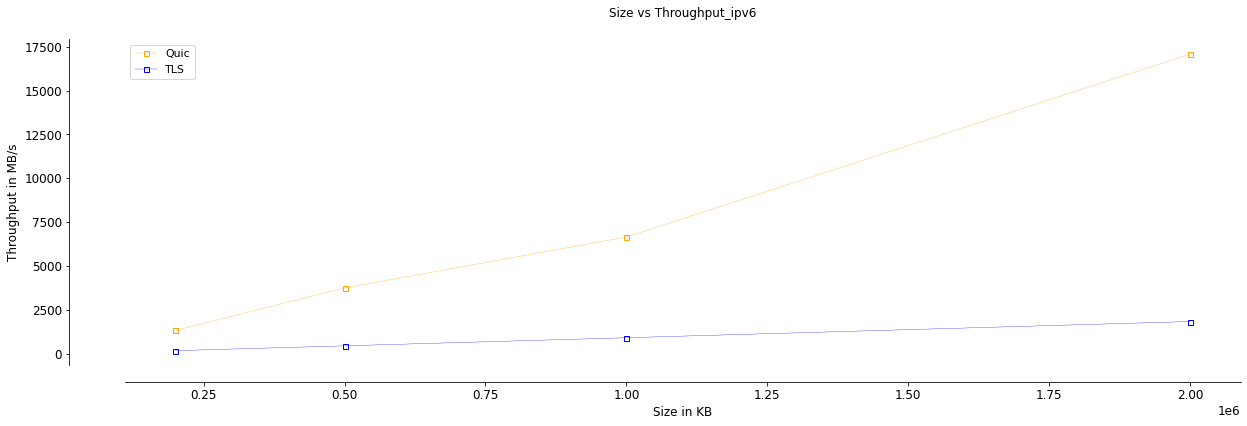

In [319]:
fig = plt.figure(figsize = (20,6))
plt.rcParams['font.size'] = 12
ax = plt.gca()
#yticks = np.arange(1000,100000000,10000)

#Quic
#plt.plot(quic6['size'], quic6['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

#plt.plot(tcp6['size'], tcp6['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
plt.plot(quic_mean['size'], quic_mean['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(tcp_mean['size'], tcp_mean['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')

ax = fig.axes[0]
ax.grid(False)
#ax.set_yticks(yticks)
#ax.set_ylim([0,1.05])
#ax.set_xlim([0,700])
#ax.set_xlim([0,10])
ax.set_xscale('linear')
ax.set_xlabel('Size in KB', fontsize=12)
ax.set_ylabel('Throughput in MB/s', fontsize=12)

plt.legend(['Quic', 'TLS'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Size vs Throughput_ipv6', fontsize=12, y=1.05)
plt.savefig('./plots2020/gdriveMunich100/sizevsThroughput_ipv6.png', format='png', bbox_inches='tight')